In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
metaData_number = 55
raw_model_evaluation_result = pd.read_excel(f"../result/ML-result-MetaData{metaData_number}所有結果.xlsx", sheet_name = "Model_Evaluation").fillna("None")
raw_permutation_importance_result = pd.read_excel(f"../result/ML-result-MetaData{metaData_number}所有結果.xlsx", sheet_name = "Permutation Importance").fillna("None")
raw_model_evaluation_result

,Data_ID,MetaData_ID,Split_ID,Standardization,Decomposition,FeatureSelection,Model,Features,Set,Number_of_Data,...,Recall_for_0,Macro Recall,Micro Recall,Accuracy,ROC-AUC,fpr,tpr,True_value,Predict_value,Predict_prob_value
0,13,MetaData-55,Merge-3-patient,None,None,None,Random Forest with Entropy,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",train,1575,...,1.000000,0.500000,0.698413,0.698413,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3010714285714286, 0.3010714285714286, 0.301..."
1,13,MetaData-55,Merge-3-patient,None,None,None,Random Forest with Entropy,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",vali,525,...,1.000000,0.500000,0.700952,0.700952,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3010714285714286, 0.3010714285714286, 0.301..."
2,13,MetaData-55,Merge-3-patient,None,None,None,Random Forest with Entropy,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",test,525,...,1.000000,0.500000,0.678095,0.678095,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3010714285714286, 0.3010714285714286, 0.301..."
3,13,MetaData-55,Merge-3-patient,None,None,None,Random Forest with Gini,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",train,1575,...,1.000000,0.500000,0.698413,0.698413,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3012483912483913, 0.3012483912483913, 0.301..."
4,13,MetaData-55,Merge-3-patient,None,None,None,Random Forest with Gini,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",vali,525,...,1.000000,0.500000,0.700952,0.700952,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3012483912483913, 0.3012483912483913, 0.301..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,21,MetaData-55,Merge-3-patient,None,None,None,LightGBM,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",vali,525,...,0.972067,0.932141,0.946667,0.946667,0.989964,"[0.0, 0.0, 0.0, 0.002793296089385475, 0.002793...","[0.0, 0.005988023952095809, 0.7485029940119761...","[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1885478024782279, 0.6615114143424037, 0.009..."
185,21,MetaData-55,Merge-3-patient,None,None,None,LightGBM,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",test,525,...,0.906667,0.780000,0.834286,0.834286,0.904018,"[0.0, 0.0, 0.0, 0.0026666666666666666, 0.00266...","[0.0, 0.006666666666666667, 0.0533333333333333...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0038824840199369937, 0.8949202459188457, 0...."
186,21,MetaData-55,Merge-3-patient,None,None,None,CatBoost,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",train,1575,...,1.000000,0.997934,0.998730,0.998730,1.000000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.002066115702479339, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.001996314229306907, 0.026089331277292266, 0..."
187,21,MetaData-55,Merge-3-patient,None,None,None,CatBoost,"['start_Heart Rate', 'Start_BP_Systolic', 'Sta...",vali,525,...,1.000000,1.000000,1.000000,1.000000,1.000000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.005988023952095809, 1.0, 1.0]","[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.06322661626872893, 0.8677643045693126, 0.01..."


## 將原始模型評估結果彙整成交叉表格

In [5]:
group_by_list = ["MetaData_ID", "Split_ID", "Standardization", "Decomposition", "FeatureSelection", "Set", "Model"]
raw_model_evaluation_result = raw_model_evaluation_result.drop(columns = [i for i in raw_model_evaluation_result.columns if raw_model_evaluation_result[i].dtype == "O" and i not in group_by_list])

# Group by
mean_totalResult = raw_model_evaluation_result.groupby(by = group_by_list).mean().drop(columns = ["Data_ID"])
std_totalResult = raw_model_evaluation_result.groupby(by = group_by_list).std().drop(columns = ["Data_ID"])

# Define MultiIndex and Column
multiindex = mean_totalResult.index
column = mean_totalResult.columns

# Combine Mean and Standardization
totalResult = pd.DataFrame([["{} ({})".format(round(one_mean, 4), round(one_std, 4)) for one_mean, one_std in zip(one_mean_list, one_std_list) ] for one_mean_list, one_std_list in zip(mean_totalResult.values.tolist(), std_totalResult.values.tolist())],
                           index = multiindex, columns = column)
totalResult.to_excel(f"../result/ML-result-MetaData{metaData_number}彙整結果.xlsx")

## 結果繪圖

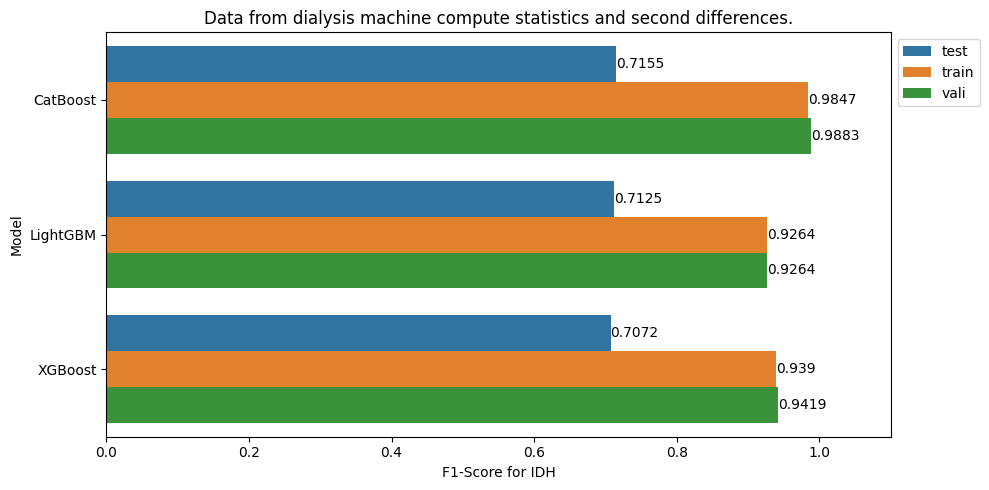

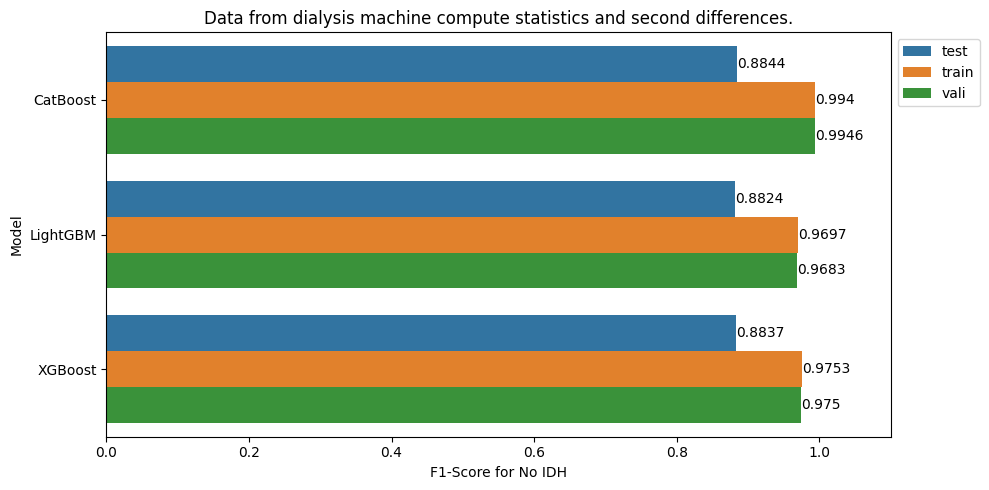

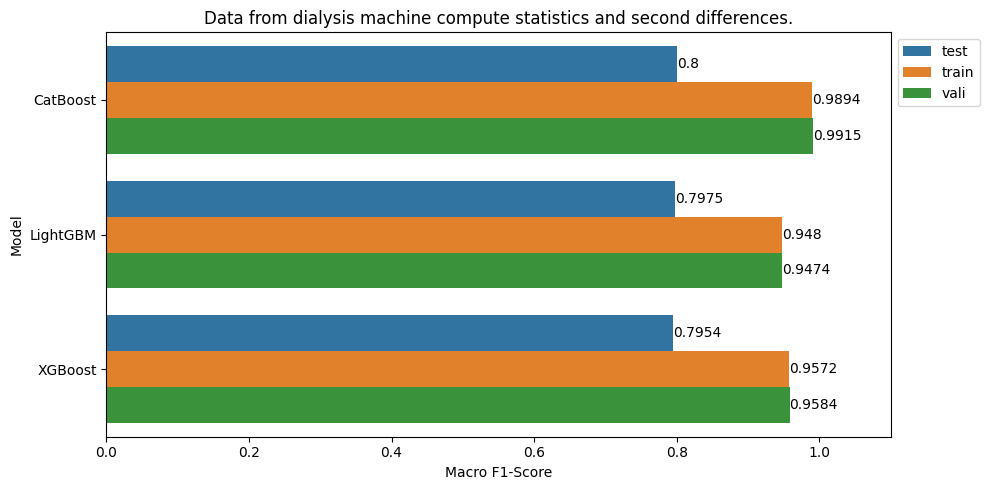

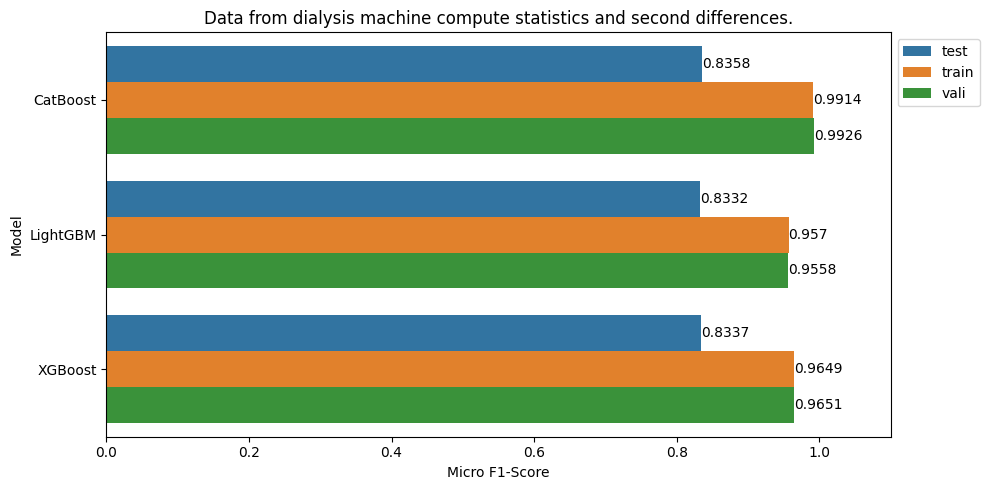

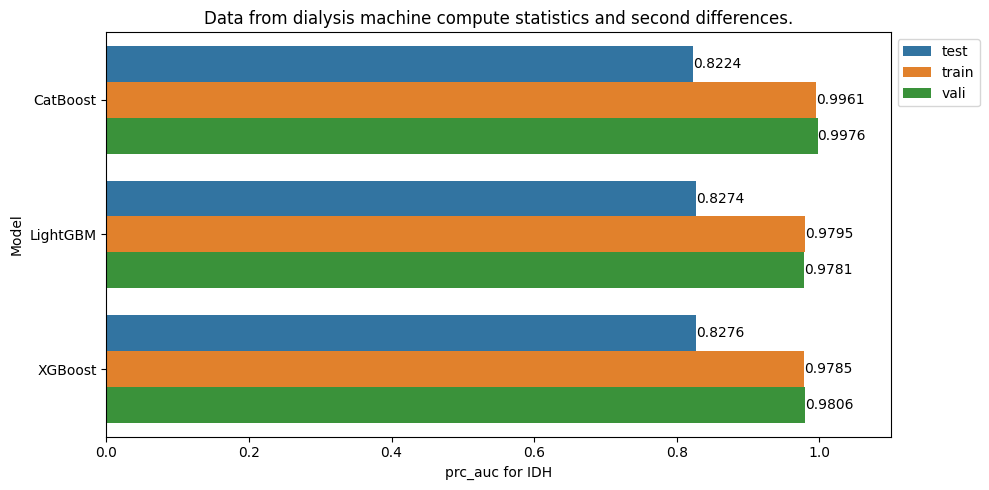

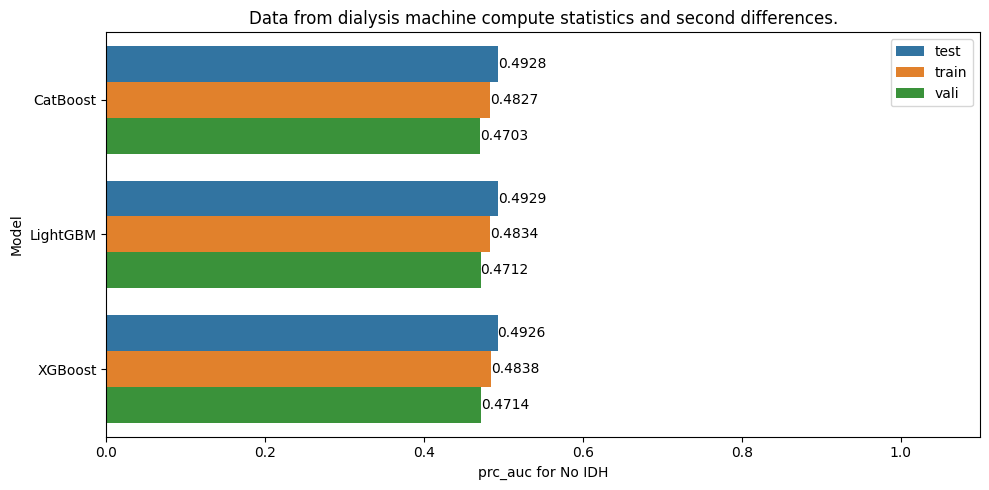

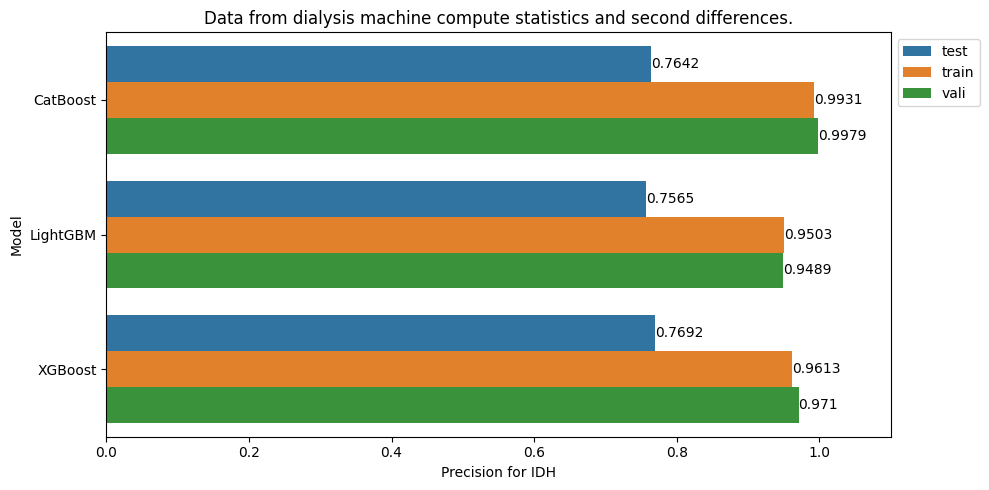

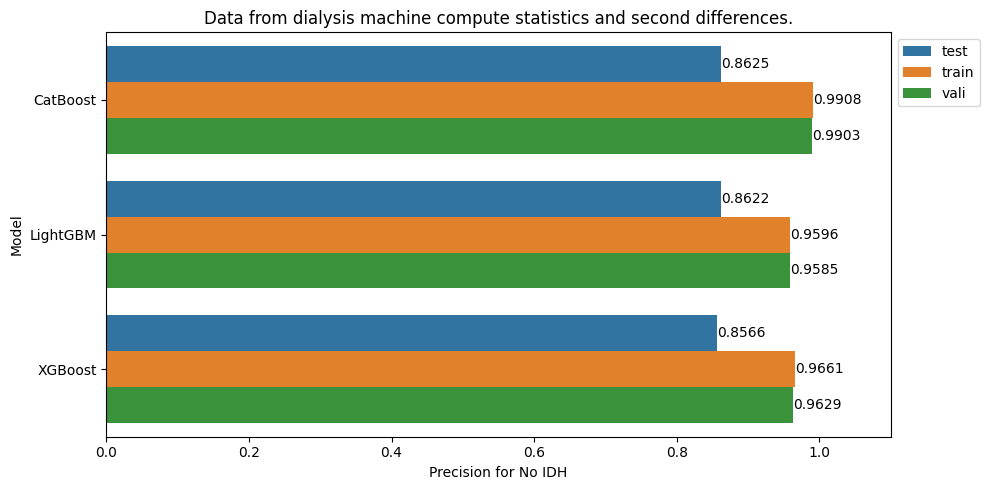

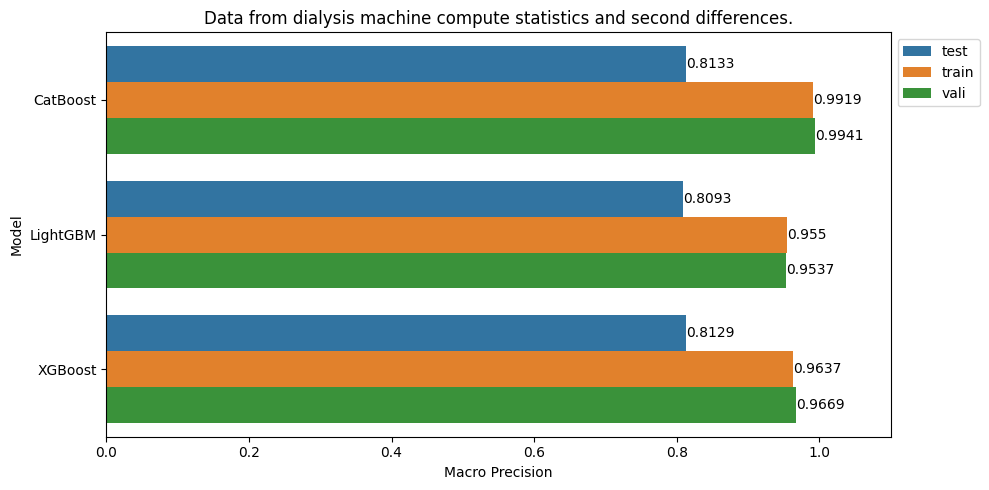

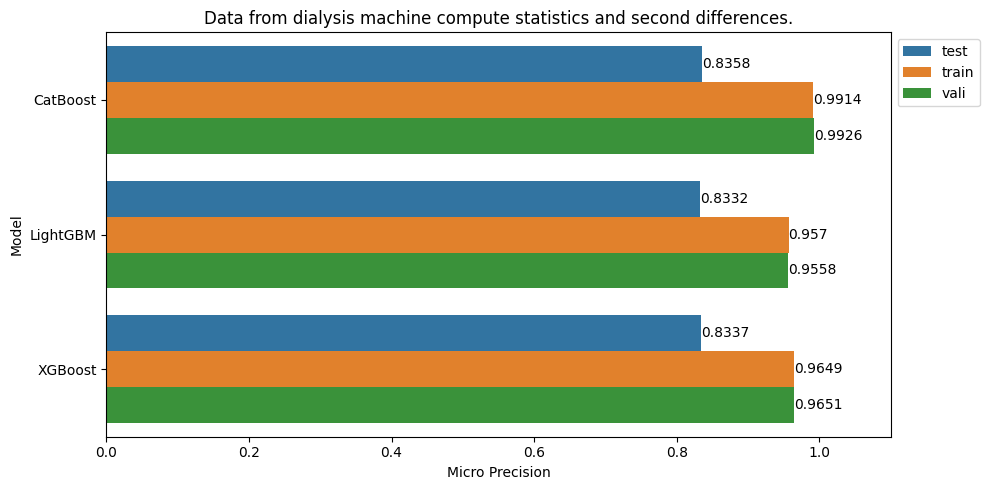

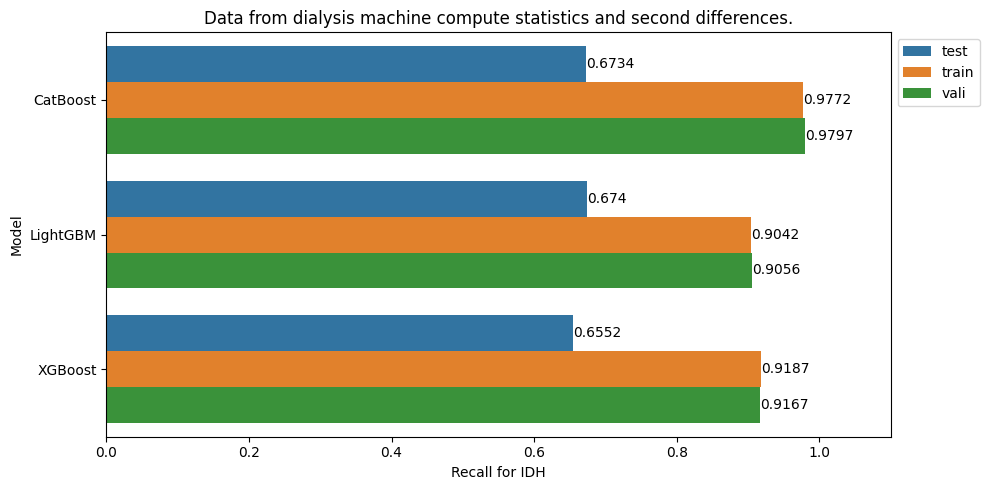

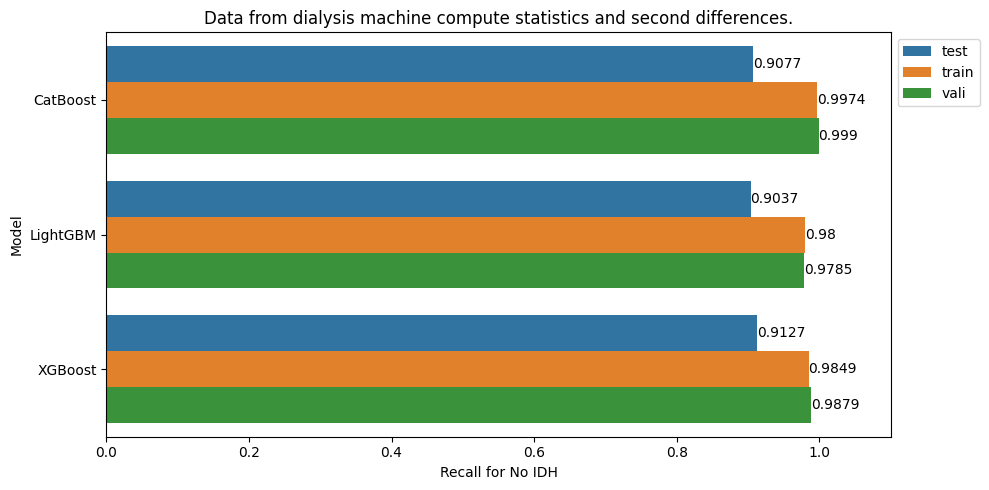

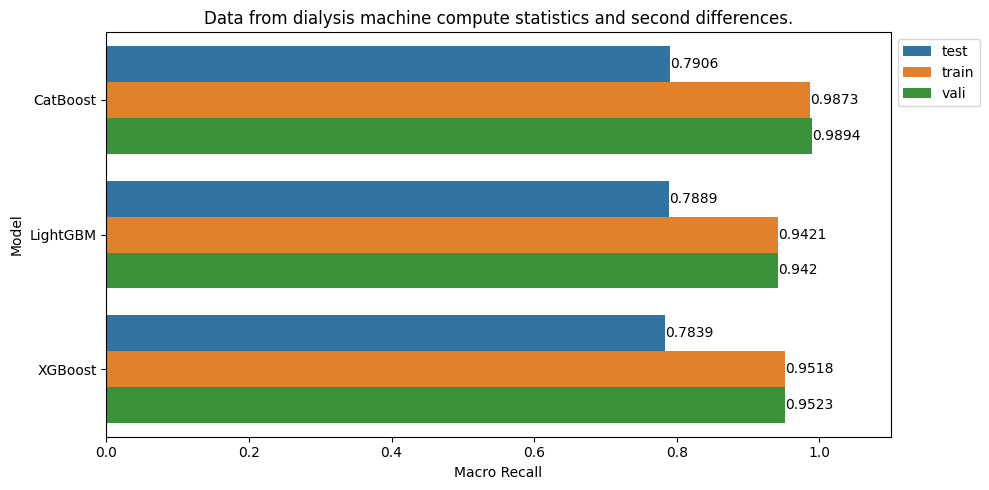

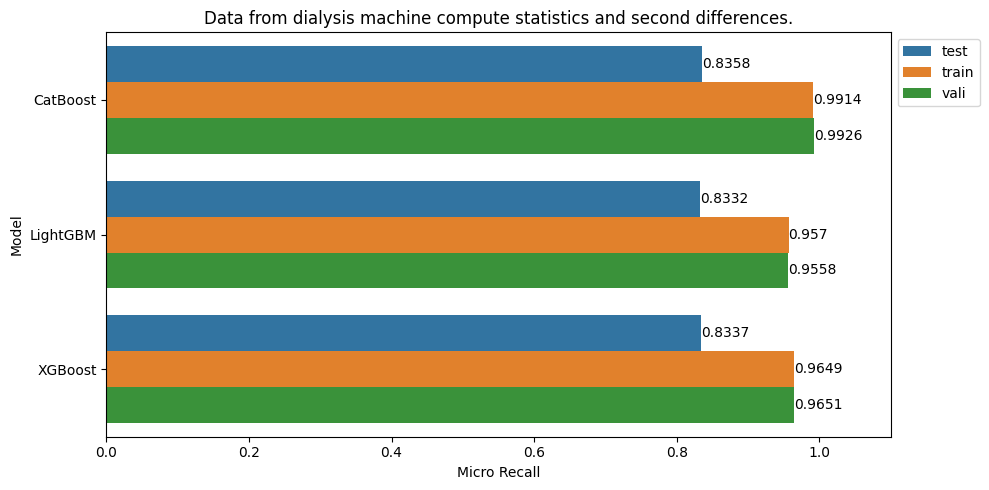

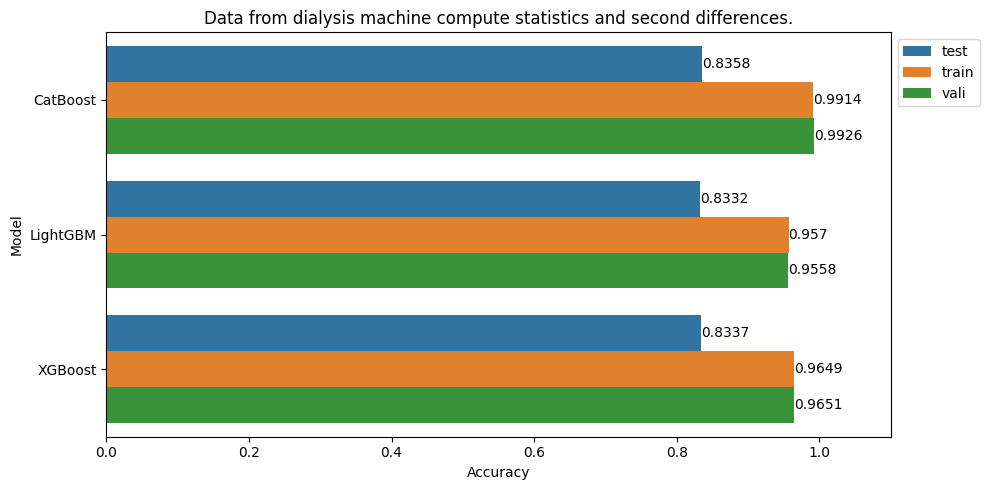

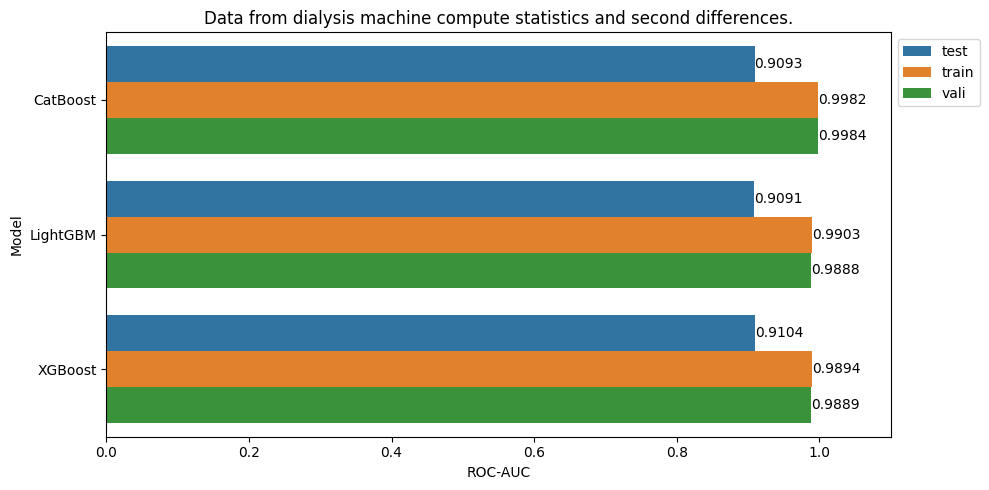

In [7]:
select_mean_totalResult = mean_totalResult.reset_index()
boosting_model = ["LightGBM", "XGBoost", "CatBoost"]
select_mean_totalResult = select_mean_totalResult.query("Standardization == 'None' and FeatureSelection == 'None' and Model in @boosting_model")

for one_column in column[1:]:
    select_mean_totalResult[one_column] = select_mean_totalResult[one_column].apply(lambda x: round(x, 4))
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(data = select_mean_totalResult, y = "Model", x = one_column, hue = "Set")
    for i in ax.containers:
        ax.bar_label(i, )

    if "_for_1" in one_column:
        one_column = one_column.replace("_for_1", " for IDH")
    elif "_for_0" in one_column:
        one_column = one_column.replace("_for_0", " for No IDH")
    elif "_1" in one_column:
        one_column = one_column.replace("_1", " for IDH")
    elif "_0" in one_column:
        one_column = one_column.replace("_0", " for No IDH")
    plt.xlabel(one_column)
    plt.legend(bbox_to_anchor = (1, 1))
    plt.xlim(0, 1.1)
    plt.title("Data from dialysis machine compute statistics and second differences.")
    plt.tight_layout()
    plt.savefig(f"../result/Result_Plot/MetaData{metaData_number}_Model_Evaluation_{one_column}.png")
    plt.show()

## 彙整 Permutation Importance

In [8]:
group_by_list = ["MetaData_ID", "Split_ID", "Standardization", "Decomposition", "FeatureSelection", "Set", "Model", "Feature"]
raw_permutation_importance_result = raw_permutation_importance_result.drop(columns = [i for i in raw_permutation_importance_result.columns if raw_permutation_importance_result[i].dtype == "O" and i not in group_by_list])

# Group by
mean_totalResult = raw_permutation_importance_result.groupby(by = group_by_list).mean().drop(columns = ["Data_ID"])
std_totalResult = raw_permutation_importance_result.groupby(by = group_by_list).std().drop(columns = ["Data_ID"])

# Define MultiIndex and Column
multiindex = mean_totalResult.index
column = mean_totalResult.columns

# Combine Mean and Standardization
totalResult = pd.DataFrame([["{} ({})".format(round(one_mean, 4), round(one_std, 4)) for one_mean, one_std in zip(one_mean_list, one_std_list) ] for one_mean_list, one_std_list in zip(mean_totalResult.values.tolist(), std_totalResult.values.tolist())],
                           index = multiindex, columns = column)

## 繪製 Permutation Importance 結果

In [ ]:
mean_totalResult = mean_totalResult.reset_index()
mean_totalResult = mean_totalResult.query("Standardization == 'None' and FeatureSelection == 'None' and Set == 'train'")

<Figure size 2000x1000 with 0 Axes>

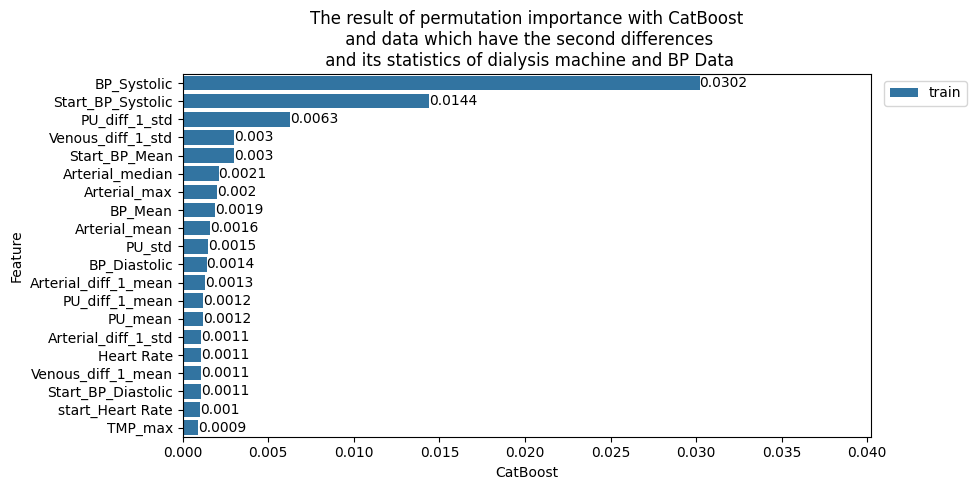

<Figure size 2000x1000 with 0 Axes>

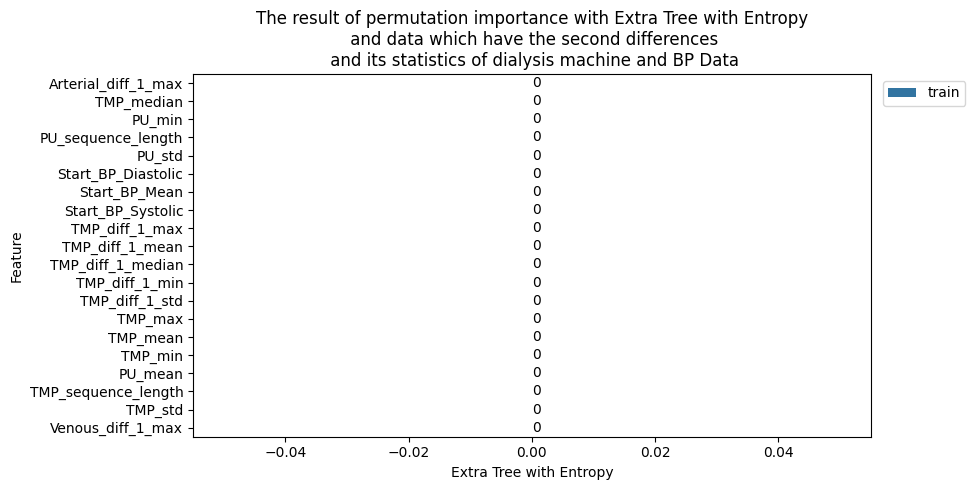

<Figure size 2000x1000 with 0 Axes>

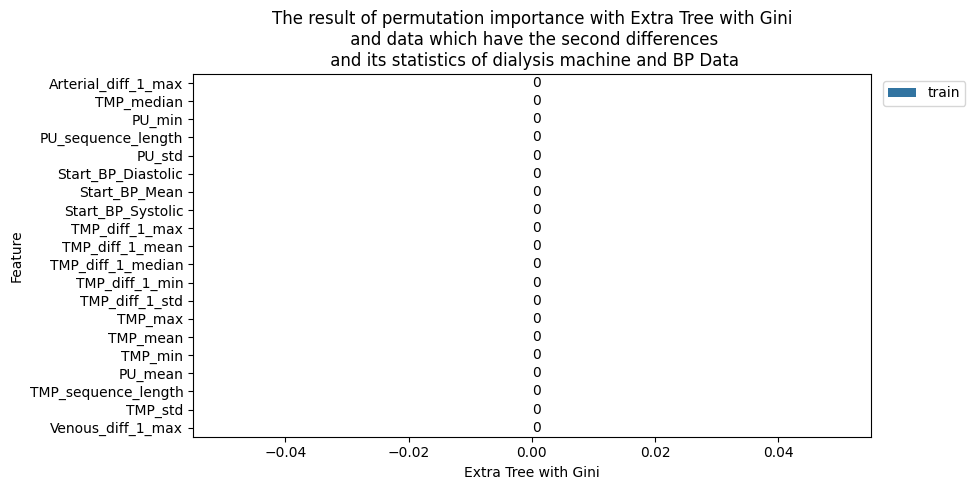

<Figure size 2000x1000 with 0 Axes>

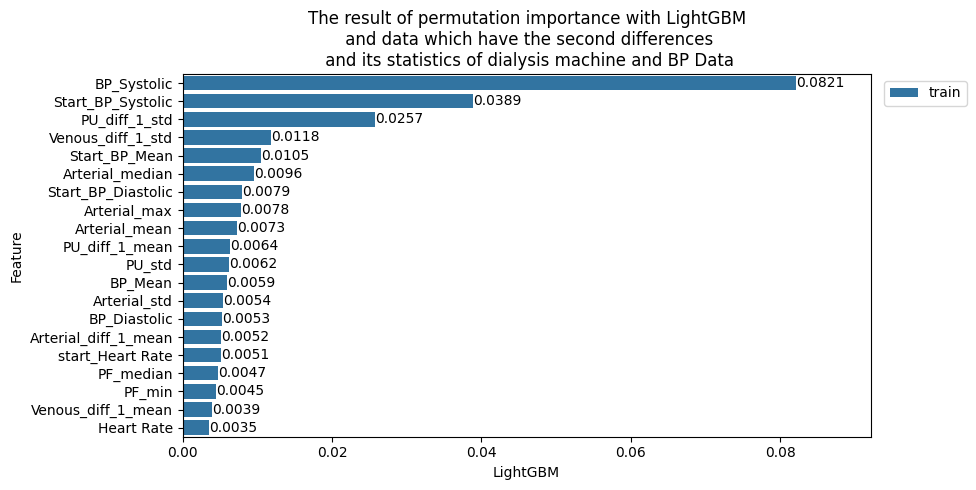

<Figure size 2000x1000 with 0 Axes>

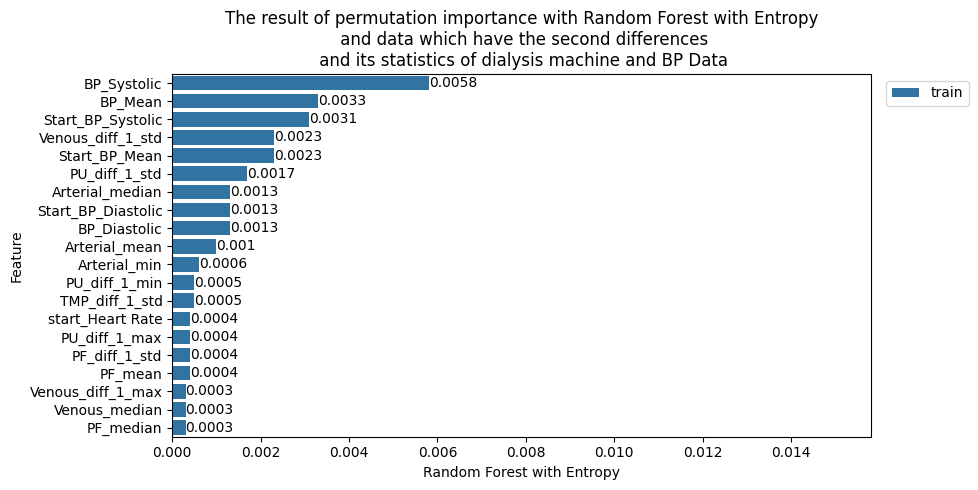

<Figure size 2000x1000 with 0 Axes>

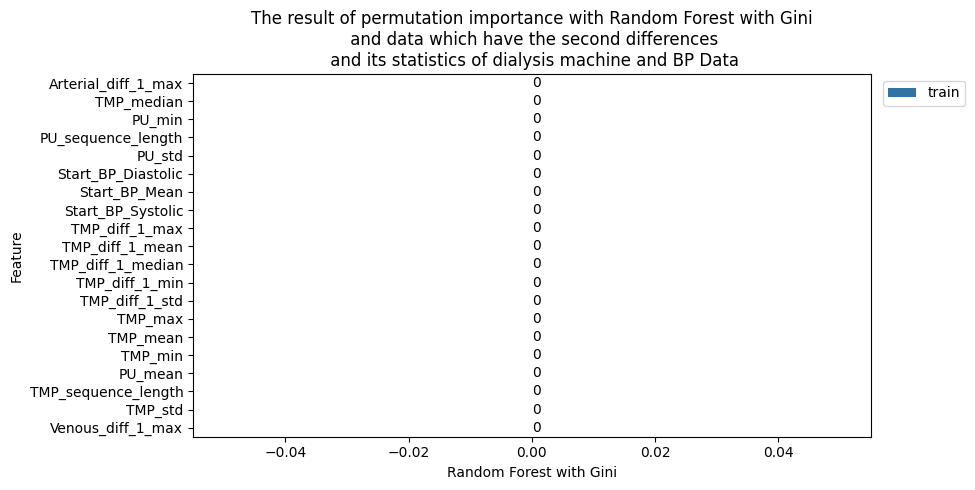

<Figure size 2000x1000 with 0 Axes>

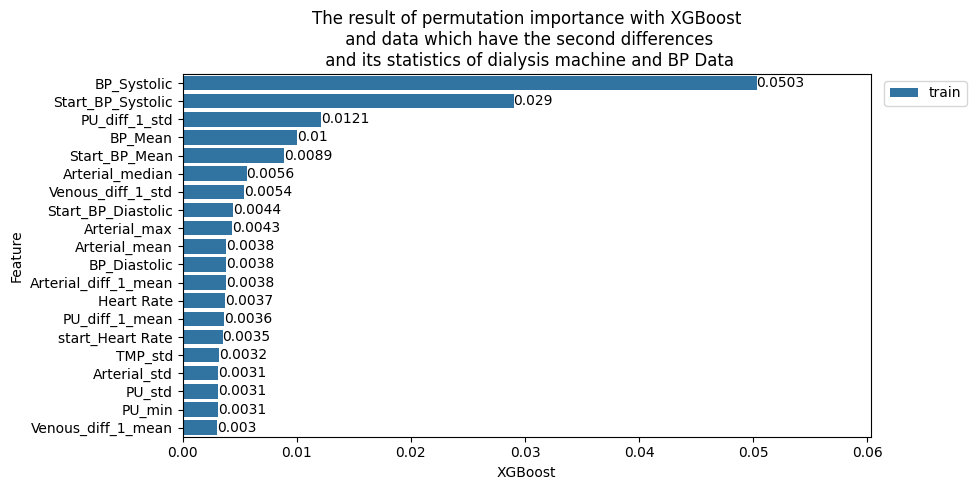

In [10]:
for one_model in mean_totalResult["Model"].unique():
    plt.figure(figsize = (20, 10))
    select_mean_totalResult = mean_totalResult.query("Model == @one_model").sort_values(by = "Importance_Mean", ascending = False).iloc[:20, :]
    select_mean_totalResult.loc[:, "Importance_Mean"] = select_mean_totalResult.loc[:, "Importance_Mean"].apply(lambda x: round(x, 4))
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(data = select_mean_totalResult, y = "Feature", x = "Importance_Mean", hue = "Set")
    for i in ax.containers:
        ax.bar_label(i, )

    plt.xlabel(one_model)
    plt.legend(bbox_to_anchor = (1.15, 1))
    if select_mean_totalResult["Importance_Mean"].unique().tolist().__len__() > 1:
        plt.xlim(0, np.max(select_mean_totalResult["Importance_Mean"].unique())+0.01)
    plt.title(f"The result of permutation importance with {one_model}\n and data which have the second differences\n and its statistics of dialysis machine and BP Data")
    plt.tight_layout()
    plt.savefig(f"../result/Result_Plot/MetaData{metaData_number}_Permutation_Importance_{one_model}.png")
    plt.show()